#### Load tensorflow

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

#### Collect Data

We will use MNIST dataset for this exercise. This dataset contains images of hand written numbers with each image being a black & white picture of size 28x28. We will download the data using tensorflow API. The dataset has 60,000 training examples and 10,000 test examples. Please note that images have already been converted to numpy arrays.

In [2]:
#Download dataset
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
#Check number of training examples and size of each example
X_train.shape

(60000, 28, 28)

In [4]:
#Check number of test examples and size of each example
X_test.shape

(10000, 28, 28)

Visualize data

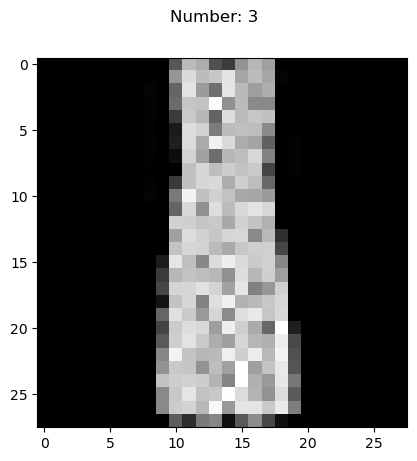

In [5]:
img_num = np.random.randint(0, X_test.shape[0]) #Get a random integer between 0 and number of examples in test dataset
plt.imshow(X_test[img_num],cmap='gray') #Show the image from test dataset
plt.suptitle('Number: ' + str(y_test[img_num]))
plt.show()

In [61]:
import tensorflow as tf

# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

# Load the training and testing data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Print the category labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print("Category Labels:")
for label, class_name in enumerate(class_names):
    print(label, "->", class_name)


Category Labels:
0 -> T-shirt/top
1 -> Trouser
2 -> Pullover
3 -> Dress
4 -> Coat
5 -> Sandal
6 -> Shirt
7 -> Sneaker
8 -> Bag
9 -> Ankle boot


#### Prepare Labels
Convert Output label to multiple values

In [6]:
#Label for an example
y_test[0]

9

In [7]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [8]:
#Label for same example after one hot encoding
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
small_X_train = X_train[0:1000]

In [11]:
small_X_train.shape

(1000, 28, 28)

In [12]:
small_y_train = y_train[0:1000]

In [13]:
small_y_train.shape

(1000, 10)

#### Build the Graph

In [63]:
#Initialize Sequential model
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [64]:
model.output

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'batch_normalization')>

Add Hidden Layers

In [65]:
#Add 1st hidden layer - check by changing the activation function to softmax
model.add(tf.keras.layers.Dense(200, activation='sigmoid'))

In [66]:
#model.add(tf.keras.layers.Dropout(0.4))

In [67]:
model.output

<KerasTensor: shape=(None, 200) dtype=float32 (created by layer 'dense')>

In [68]:
model.add(tf.keras.layers.BatchNormalization())

In [69]:
model.output

<KerasTensor: shape=(None, 200) dtype=float32 (created by layer 'batch_normalization_1')>

In [70]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))

In [71]:
#model.add(tf.keras.layers.LeakyReLU(0.03))
#change activation to sigmoid and use optimizer = 'adam'

In [72]:
model.add(tf.keras.layers.BatchNormalization())

In [73]:
model.output

<KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'batch_normalization_2')>

In [74]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60, activation='relu'))

In [75]:
model.add(tf.keras.layers.BatchNormalization())

In [76]:
#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30, activation='relu'))

In [77]:
model.add(tf.keras.layers.BatchNormalization())

In [78]:
model.output

<KerasTensor: shape=(None, 30) dtype=float32 (created by layer 'batch_normalization_4')>

Add Output Layer

In [79]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

Compile the Model

In [80]:
#Compile the model
# sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True)

# model.compile(optimizer='adam', loss='categorical_crossentropy', 
#               metrics=['accuracy'])

sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', 
              metrics=['accuracy'])


Review model

In [81]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 batch_normalization_1 (Batc  (None, 200)              800       
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)              4

#### Train the model

In [82]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('mnist_fashon_v1.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

In [83]:
model.fit(X_train,y_train,          
          validation_data=(X_test,y_test),
          epochs=25,
          batch_size=32, 
          callbacks=[model_checkpoint])

Epoch 1/25


2024-03-15 20:50:48.968077: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - ETA: 0s - loss: 1.1357 - accuracy: 0.6557

2024-03-15 20:51:25.406120: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.77580, saving model to mnist_fashon_v1.h5
1875/1875 [==============================] - 40s 21ms/step - loss: 1.1357 - accuracy: 0.6557 - val_loss: 0.7368 - val_accuracy: 0.7758
Epoch 2/25
1875/1875 [==============================] - ETA: 0s - loss: 0.7293 - accuracy: 0.7743
Epoch 2: val_accuracy improved from 0.77580 to 0.80920, saving model to mnist_fashon_v1.h5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.7293 - accuracy: 0.7743 - val_loss: 0.5988 - val_accuracy: 0.8092
Epoch 3/25
1874/1875 [============================>.] - ETA: 0s - loss: 0.6254 - accuracy: 0.7984
Epoch 3: val_accuracy improved from 0.80920 to 0.82400, saving model to mnist_fashon_v1.h5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.6254 - accuracy: 0.7984 - val_loss: 0.5365 - val_accuracy: 0.8240
Epoch 4/25
1875/1875 [==============================] - ETA: 0s - loss: 0.5732 - accuracy: 0.8093
Epoch 4: val_accuracy improved

In [84]:
model.save('mnist_fashon_v1.h5')

In [86]:
model.fit(X_train,y_train,          
          validation_data=(X_test,y_test),
          epochs=100,
          initial_epoch=25,
          batch_size=32, 
          callbacks=[model_checkpoint])

Epoch 26/100
1873/1875 [============================>.] - ETA: 0s - loss: 0.3577 - accuracy: 0.8730
Epoch 26: val_accuracy improved from 0.86960 to 0.86990, saving model to mnist_fashon_v1.h5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.3578 - accuracy: 0.8730 - val_loss: 0.3652 - val_accuracy: 0.8699
Epoch 27/100
1875/1875 [==============================] - ETA: 0s - loss: 0.3534 - accuracy: 0.8744
Epoch 27: val_accuracy did not improve from 0.86990
1875/1875 [==============================] - 41s 22ms/step - loss: 0.3534 - accuracy: 0.8744 - val_loss: 0.3627 - val_accuracy: 0.8696
Epoch 28/100
1873/1875 [============================>.] - ETA: 0s - loss: 0.3482 - accuracy: 0.8768
Epoch 28: val_accuracy improved from 0.86990 to 0.87060, saving model to mnist_fashon_v1.h5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.3481 - accuracy: 0.8768 - val_loss: 0.3618 - val_accuracy: 0.8706
Epoch 29/100
1873/1875 [============================>.] - E

In [ ]:
model.save('mnist_fashon_v1.h5')

In [38]:
!ls -l

total 7480
-rw-r--r--@ 1 vidyadharbendre  staff  529649 Feb 22 00:34 01_linear_vs_non_linear.ipynb
-rw-------@ 1 vidyadharbendre  staff    2821 Feb 25  2022 1. Tensorflow_Hello_World_tf2.ipynb
-rw-r--r--@ 1 vidyadharbendre  staff   90243 Mar  8 10:02 1_Tensorflow_basics.ipynb
-rw-r--r--@ 1 vidyadharbendre  staff    3004 Feb 17 20:50 1_tensorflow.ipynb
-rw-------@ 1 vidyadharbendre  staff   20788 Feb 21 23:41 2a. Boston Housing Prices.ipynb
-rw-------@ 1 vidyadharbendre  staff   16977 Feb 21 23:43 2b. Boston Housing Prices_Normalization.ipynb
-rw-------@ 1 vidyadharbendre  staff   30691 Mar  8 23:35 3. Boston_Housing_Prices_KERAS.ipynb
-rw-------@ 1 vidyadharbendre  staff  123794 Mar  9 10:40 4. Classification_MNIST_Logistic_Keras.ipynb
-rw-------@ 1 vidyadharbendre  staff  125969 Mar  9 07:46 5. Classification_MNIST_Logistic_Keras_Batch.ipynb
-rw-------@ 1 vidyadharbendre  staff    4507 Mar  9 07:07 5. Classification_MNIST_Logistic_Keras_batching.ipynb
-rw-------@ 1 vidyadharbendre  st

Load a saved model

In [39]:
model = tf.keras.models.load_model('mnist_fashon_v1.h5')

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 batch_normalization_1 (Batc  (None, 200)              800       
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)              4

### Model Prediction

In [87]:
model.predict(X_test[0])

ValueError: in user code:

    File "/Users/vidyadharbendre/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "/Users/vidyadharbendre/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/vidyadharbendre/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/vidyadharbendre/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1791, in predict_step
        return self(x, training=False)
    File "/Users/vidyadharbendre/miniforge3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/vidyadharbendre/miniforge3/lib/python3.9/site-packages/keras/layers/reshaping/reshape.py", line 111, in _fix_unknown_dimension
        raise ValueError(msg)

    ValueError: Exception encountered when calling layer "reshape" (type Reshape).
    
    total size of new array must be unchanged, input_shape = [28], output_shape = [784]
    
    Call arguments received by layer "reshape" (type Reshape):
      • inputs=tf.Tensor(shape=(None, 28), dtype=float32)


In [88]:
import numpy as np

What input shape model is expecting?

In [89]:
model.input

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'reshape_input')>

Predicting on first example

In [90]:
X_test[0].shape

(28, 28)

In [91]:
model.predict(X_test[0])

ValueError: in user code:

    File "/Users/vidyadharbendre/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "/Users/vidyadharbendre/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/vidyadharbendre/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/vidyadharbendre/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1791, in predict_step
        return self(x, training=False)
    File "/Users/vidyadharbendre/miniforge3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/vidyadharbendre/miniforge3/lib/python3.9/site-packages/keras/layers/reshaping/reshape.py", line 111, in _fix_unknown_dimension
        raise ValueError(msg)

    ValueError: Exception encountered when calling layer "reshape" (type Reshape).
    
    total size of new array must be unchanged, input_shape = [28], output_shape = [784]
    
    Call arguments received by layer "reshape" (type Reshape):
      • inputs=tf.Tensor(shape=(None, 28), dtype=float32)


Why are we getting the error?

In [92]:
X_test[0].shape

(28, 28)

Building a Batch

In [93]:
input_data = np.expand_dims(X_test[0], axis=0)
input_data.shape

(1, 28, 28)

Model Prediction

In [94]:
pred = model.predict(input_data)

1/1 [==============================] - 0s 229ms/step


2024-03-15 22:03:40.736536: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [95]:
pred.shape

(1, 10)

In [96]:
pred

array([[1.7298369e-06, 4.3138622e-05, 6.1152950e-06, 9.5457408e-06,
        5.0716149e-06, 2.7939477e-03, 3.8203889e-06, 1.6347362e-02,
        4.3589744e-06, 9.8078489e-01]], dtype=float32)

In [97]:
pred[0]

array([1.7298369e-06, 4.3138622e-05, 6.1152950e-06, 9.5457408e-06,
       5.0716149e-06, 2.7939477e-03, 3.8203889e-06, 1.6347362e-02,
       4.3589744e-06, 9.8078489e-01], dtype=float32)

Predicted Class

In [98]:
np.argmax(pred[0])

9

In [99]:
np.max(pred[0])

0.9807849

Actual Class

In [100]:
np.argmax(y_test[0])

9

Visual confirmation

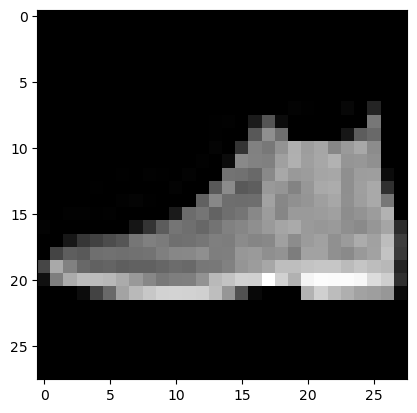

In [101]:
#Lets print the image as well
import matplotlib.pyplot as plt
plt.imshow(X_test[0],cmap='gray')
plt.show()

In [102]:
import tensorflow as tf

# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

# Load the training and testing data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Print the category labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print("Category Labels:")
for label, class_name in enumerate(class_names):
    print(label, "->", class_name)

Category Labels:
0 -> T-shirt/top
1 -> Trouser
2 -> Pullover
3 -> Dress
4 -> Coat
5 -> Sandal
6 -> Shirt
7 -> Sneaker
8 -> Bag
9 -> Ankle boot
